In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import random
import math

In [2]:
def get_distance(x1, y1, x2, y2) :
    return np.sqrt((x1-x2)**2 + abs(y1-y2)**2)

def total_distance(solution, df):
    distance = 0
    for i in range(len(solution)-1):
        fro = df.loc[solution[i]]
        to = df.loc[solution[i+1]]
        distance += get_distance(fro["x"], fro["y"], to["x"], to["y"])
    # make it a circle
    fro = df.loc[solution[len(solution)-1]]
    to = df.loc[solution[0]]
    distance += get_distance(fro["x"], fro["y"], to["x"], to["y"])
    return distance

def plot_solution(solution, df):
    for i in range(len(solution)-1):
        fro = df.loc[solution[i]]
        to = df.loc[solution[i+1]]
        plt.arrow(fro["x"], fro["y"], to["x"]-fro["x"], to["y"]-fro["y"])
    fro = df.loc[solution[len(solution)-1]]
    to = df.loc[solution[0]]
    plt.arrow(fro["x"], fro["y"], to["x"]-fro["x"], to["y"]-fro["y"])

In [13]:
def triangle_swap(solution)

def sim_anneal(solution, df, K, stopK, alpha, ittol):
    assert alpha < 1, "choose a smaller alpha"
    all_dist = []
    i = 0
    while K > stopK and i < ittol:
        # elementary edit, triangle swap for now
        i1, i2, i3 = random.sample(range(0, len(solution)-1), 3)
        new_solution = solution
        new_solution[i1], new_solution[i2], new_solution[i3] = new_solution[i2], new_solution[i3], new_solution[i1]
        
        # decide whether to accept the new solution
        if total_distance(new_solution, df) < total_distance(solution, df):
            solution = new_solution
        else:
            # accept with probability depending on temperature
            if np.random.random() < math.exp(abs((total_distance(new_solution, df)- total_distance(solution, df)))/K):
                solution = new_solution
        # decrease temperature
        all_dist.append(total_distance(solution, df))
        K *= alpha
        i += 1
        
    if len(set(solution)) != len(solution):
        raise ValueError
    return solution, all_dist
    

In [3]:
df = pd.read_csv("data/eil51.tsp.txt", skiprows=6, names=["id", "x", "y"], header=None, delimiter = ' ', index_col=0)

<AxesSubplot:xlabel='x', ylabel='y'>

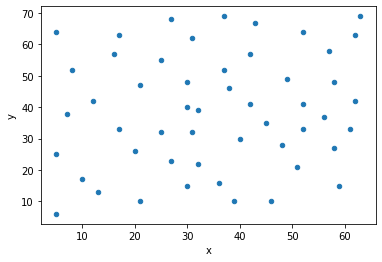

In [4]:
df.plot.scatter("x", "y")

In [5]:
# tidy data
df = df.sort_values("x").drop("EOF")

In [6]:
# find naive solution along 1 dimension
solution = []
for row in range(df.shape[0]):
    solution.append(df.iloc[row].name)

In [7]:
len(solution)

51

In [8]:
total_distance(solution, df)

1276.9645569807344

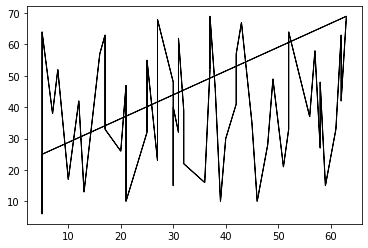

In [9]:
plot_solution(solution, df)

In [10]:
# brute force, very bad
i = 0
while True:
    random.shuffle(solution)
    if total_distance(solution, df) < 1200 or i > 1000:
        break
    i += 1

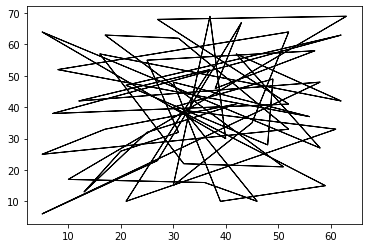

In [11]:
plot_solution(solution, df)

In [12]:
total_distance(solution, df)

1787.7995274677091

In [14]:
sol, all_dist = sim_anneal(solution, df, 1, 0.000001, 0.99, 100000)

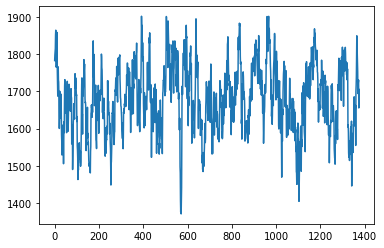

In [15]:
plt.plot(all_dist)

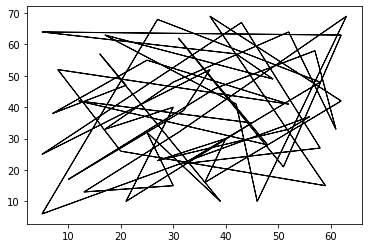

In [16]:
plot_solution(sol, df)

In [17]:
df

,x,y
id,,
13,5.0,25.0
40,5.0,6.0
43,5.0,64.0
25,7.0,38.0
24,8.0,52.0
41,10.0,17.0
14,12.0,42.0
19,13.0,13.0
23,16.0,57.0
